In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# import some data to play with
data = pd.read_csv('Fraud_check.csv',index_col=0)
data = data.reset_index()

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data = data.rename(columns = {'Marital.Status': 'MaritalStatus', 'Taxable.Income': 'TaxableIncome', 'City.Population': 'CityPopulation', 'Work.Experience': 'WorkExperience'}, inplace = False)
data.head()

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
data=pd.get_dummies(data,columns=['Undergrad','MaritalStatus','Urban'], drop_first=True)
data

,TaxableIncome,CityPopulation,WorkExperience,Undergrad_YES,MaritalStatus_Married,MaritalStatus_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [6]:
data["TaxInc"] = pd.cut(data["TaxableIncome"], bins = [min(data.TaxableIncome),30000, max(data.TaxableIncome)], labels = ["Risky", "Good"])
data

,TaxableIncome,CityPopulation,WorkExperience,Undergrad_YES,MaritalStatus_Married,MaritalStatus_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   TaxableIncome          600 non-null    int64   
 1   CityPopulation         600 non-null    int64   
 2   WorkExperience         600 non-null    int64   
 3   Undergrad_YES          600 non-null    uint8   
 4   MaritalStatus_Married  600 non-null    uint8   
 5   MaritalStatus_Single   600 non-null    uint8   
 6   Urban_YES              600 non-null    uint8   
 7   TaxInc                 599 non-null    category
dtypes: category(1), int64(3), uint8(4)
memory usage: 17.2 KB


In [8]:
x=data.iloc[:,0:7]
y=data['TaxInc']

In [9]:
x

,TaxableIncome,CityPopulation,WorkExperience,Undergrad_YES,MaritalStatus_Married,MaritalStatus_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [10]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [11]:
data['TaxInc'].unique()

['Good', 'Risky', NaN]
Categories (2, object): ['Risky' < 'Good']

In [12]:
data.TaxInc.value_counts()

Good     476
Risky    123
Name: TaxInc, dtype: int64

In [13]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [14]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

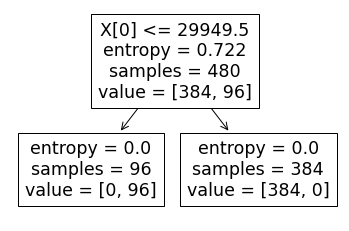

In [15]:
#PLot the decision tree
tree.plot_tree(model);


In [16]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Good     92
Risky    28
dtype: int64

In [17]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Ris

In [18]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good,Risky
TaxInc,,
Risky,0,27
Good,92,0


In [19]:
# Accuracy 
np.mean(preds==y_test)

0.9916666666666667

In [20]:
y_test = y_test.astype(str)
y_test

159     Good
307     Good
253     Good
528     Good
137    Risky
       ...  
102     Good
577     Good
18      Good
560     Good
62      Good
Name: TaxInc, Length: 120, dtype: object

In [21]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        92
       Risky       0.96      1.00      0.98        27
         nan       0.00      0.00      0.00         1

    accuracy                           0.99       120
   macro avg       0.65      0.67      0.66       120
weighted avg       0.98      0.99      0.99       120



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Building Decision Tree Classifier (CART) using Gini Criteria

In [22]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [23]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [24]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.9916666666666667

#### Decision Tree Regression Example

In [25]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [26]:
array = data.values
X = array[:,0:7]
y = array[:,7]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [28]:
y_test = y_test.astype(str)

array(['Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'nan',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'G

In [29]:
label_encoder = preprocessing.LabelEncoder()
y_test= label_encoder.fit_transform(y_test) 

In [30]:
label_encoder = preprocessing.LabelEncoder()
y_train= label_encoder.fit_transform(y_train) 

In [31]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [32]:
#Find the accuracy
model.score(X_test,y_test)

0.9710229767305723